In [1]:
from ads_tools import Ads
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline
sns.set()
sns.set_context('paper')

In [2]:
flats = Ads('flat')

In [3]:
flats.filter_and_transform_to_df(price_limit=15000.0,size_limit=300.0)

Dataset transfromed to a DataFrame and formatted
NA values removed from columns: 'price', 'date'


In [4]:
dataset = flats.filtered_data

In [5]:
dataset.head()

,adress,price,coords,date,advertiser,available,n_rooms,n_bath,location,desc,smoking,parking,animals,type,street_regex,size_m2,url
1001294596470910467972909,Giełdowa,3200.0,NaN,2017-08-13,agency,None,2.0,1.0,Wola,NOWOCZESNE i ATRAKCYJNE DWUPOKOJOWE mieszkanie...,None,Garaż,None,Mieszkanie,"[Towarowej, Giełdowej]",48.0,https://www.gumtree.pl/a-mieszkania-i-domy-do-...
1001295618690910467972909,Biały Kamień,4000.0,NaN,2017-08-09,agency,None,2.0,1.0,Mokotow,"ATRAKCYJNY, nowocześnie urządzony apartament n...",None,Garaż,None,Mieszkanie,None,60.0,https://www.gumtree.pl/a-mieszkania-i-domy-do-...
1001295631820910467972909,Jana Pawła Woronicza,4500.0,NaN,2017-07-30,agency,None,2.0,1.0,Mokotow,"DWUPOZIOMOWE, NOWE mieszkanie typu SOFT LOFT u...",None,Garaż,None,Mieszkanie,None,60.0,https://www.gumtree.pl/a-mieszkania-i-domy-do-...
1001297367450910467972909,Puławska,3200.0,NaN,2017-07-28,agency,None,2.0,1.0,Mokotow,"Umeblowane, wykończone w wysokim standardzie m...",None,Garaż,None,Mieszkanie,None,56.0,https://www.gumtree.pl/a-mieszkania-i-domy-do-...
1001297456900910467972909,Mokotów,3000.0,NaN,2017-08-04,agency,None,2.0,1.0,Mokotow,W pełni umeblowane mieszkanie o powierzchni 54...,None,Garaż,None,Mieszkanie,"[zabaw, zabaw, [zabaw, oraz]]",54.0,https://www.gumtree.pl/a-mieszkania-i-domy-do-...


In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 98391 entries, 1001294596470910467972909 to 1002146009000910970557309
Data columns (total 17 columns):
adress          98160 non-null object
price           98391 non-null float64
coords          776 non-null object
date            98391 non-null datetime64[ns]
advertiser      97463 non-null object
available       38516 non-null object
n_rooms         98189 non-null float64
n_bath          49819 non-null float64
location        98391 non-null object
desc            98391 non-null object
smoking         13427 non-null object
parking         41725 non-null object
animals         17379 non-null object
type            98391 non-null object
street_regex    61830 non-null object
size_m2         98391 non-null float64
url             98391 non-null object
dtypes: datetime64[ns](1), float64(4), object(12)
memory usage: 13.5+ MB


In [7]:
dataset.describe()

C:\Users\Daniel\Anaconda3\lib\site-packages\numpy\lib\function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,price,n_rooms,n_bath,size_m2
count,98391.000000,98189.000000,49819.000000,98391.000000
mean,3371.211828,2.348328,1.129047,61.543851
std,1729.054920,0.836763,0.349789,28.071170
min,1.000000,1.000000,1.000000,1.000000
25%,2440.000000,NaN,NaN,44.000000
50%,2900.000000,NaN,NaN,54.000000
75%,3700.000000,NaN,NaN,70.000000
max,14950.000000,6.000000,4.000000,295.000000


In [8]:
dataset.reset_index(inplace=True)

In [9]:
cols = ['price','advertiser','n_rooms','n_bath','location','smoking','size_m2','parking','animals']
dataset = dataset[cols]

In [10]:
dataset.head()

,price,advertiser,n_rooms,n_bath,location,smoking,size_m2,parking,animals
0,3200.0,agency,2.0,1.0,Wola,None,48.0,Garaż,None
1,4000.0,agency,2.0,1.0,Mokotow,None,60.0,Garaż,None
2,4500.0,agency,2.0,1.0,Mokotow,None,60.0,Garaż,None
3,3200.0,agency,2.0,1.0,Mokotow,None,56.0,Garaż,None
4,3000.0,agency,2.0,1.0,Mokotow,None,54.0,Garaż,None


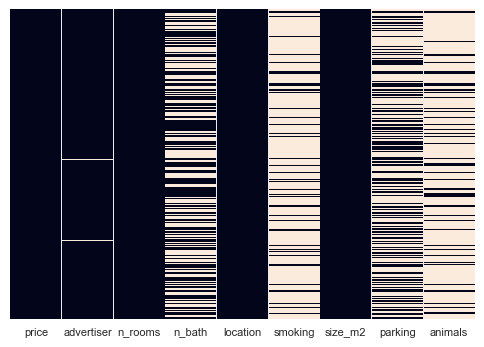

In [11]:
sns.heatmap(dataset.isnull(),cbar=False,yticklabels=False)
plt.show()

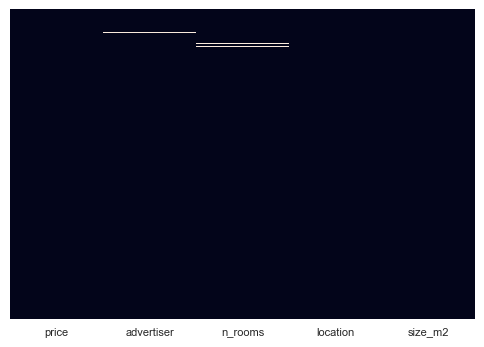

In [12]:
cols = ['price','advertiser','n_rooms','location','size_m2']
dataset = dataset[cols]
sns.heatmap(dataset.isnull(),cbar=False,yticklabels=False)
plt.show()

In [13]:
dataset.dropna(inplace=True)

In [14]:
dataset['price_m2'] = dataset['price']/dataset['size_m2']

In [15]:
dataset = dataset[dataset['price_m2']<450.0]

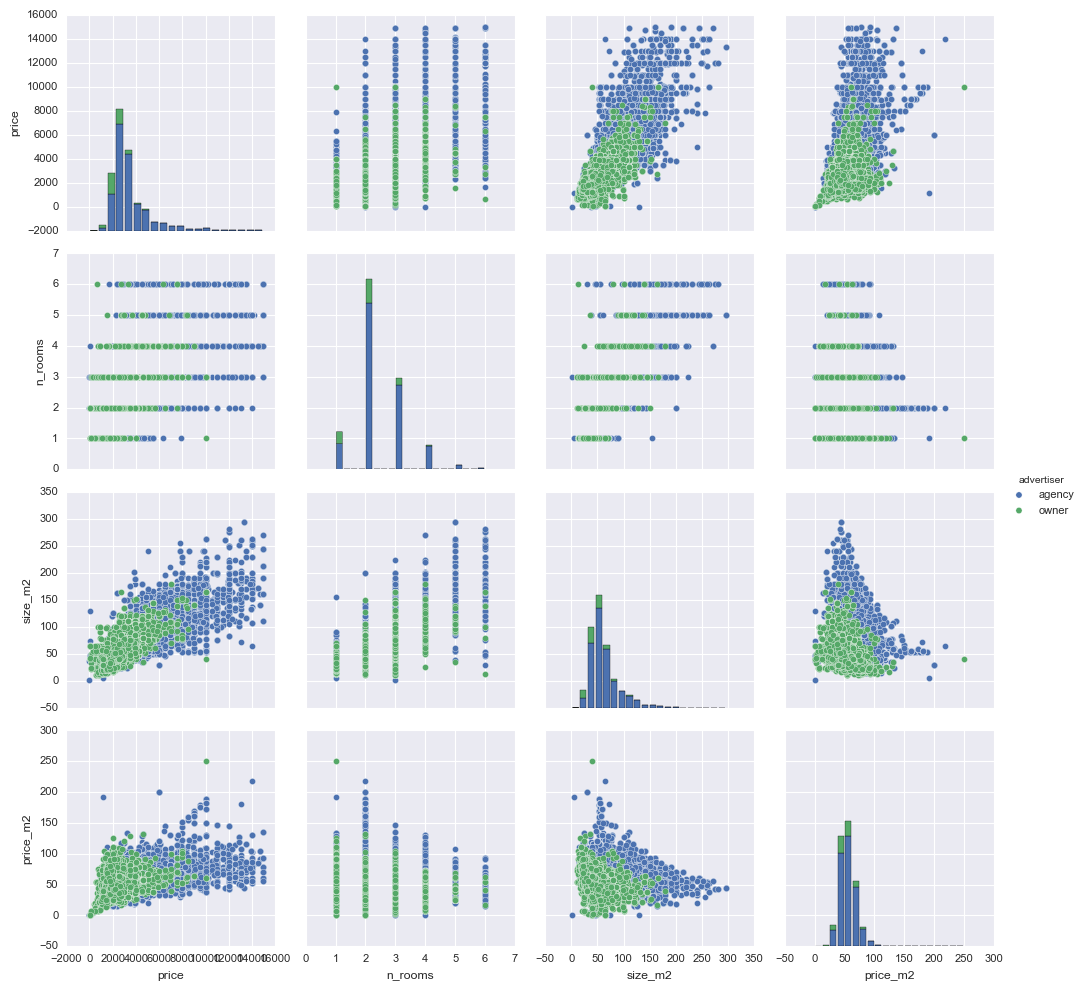

In [16]:
sns.pairplot(dataset,hue='advertiser', diag_kws=dict(bins=20))
plt.show()

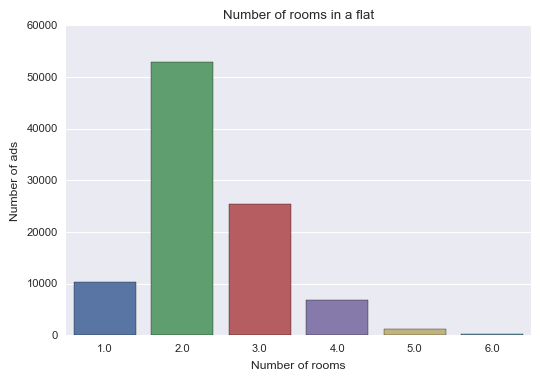

In [17]:
ax = sns.countplot(x='n_rooms',data=dataset)
ax.set(xlabel='Number of rooms', ylabel='Number of ads', title='Number of rooms in a flat')
plt.show()

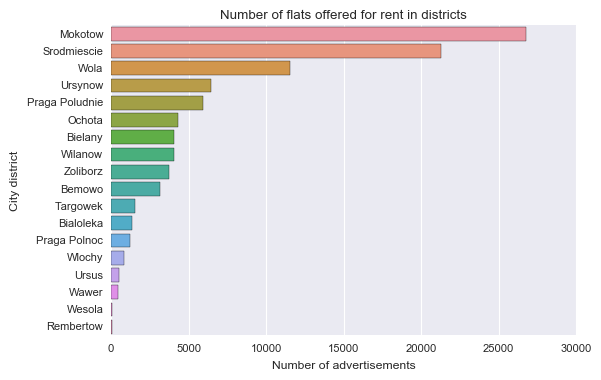

In [18]:
ranks = dataset.groupby('location')['price_m2'].count().sort_values()[::-1].index
ax = sns.countplot(y='location',data=dataset,order=ranks)
ax.set(xlabel='Number of advertisements', ylabel='City district', title='Number of flats offered for rent in districts')
plt.show()

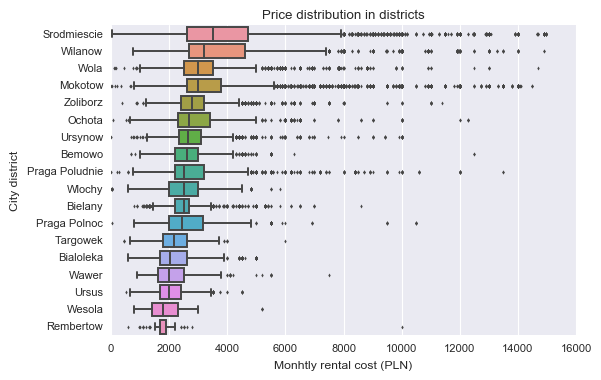

In [19]:
ranks = dataset.groupby('location')['price'].median().sort_values()[::-1].index
ax = sns.boxplot(data=dataset, y='location',x='price',fliersize=2,order=ranks)
ax.set(xlabel='Monhtly rental cost (PLN)', ylabel='City district', title='Price distribution in districts')
plt.show()

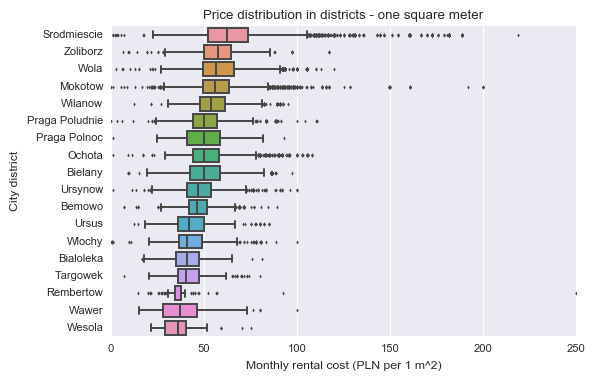

In [20]:
ranks = dataset.groupby('location')['price_m2'].median().sort_values()[::-1].index
ax = sns.boxplot(data=dataset, y='location',x='price_m2',fliersize=2,order=ranks)
ax.set(xlabel='Monthly rental cost (PLN per 1 m^2)', ylabel='City district', 
       title='Price distribution in districts - one square meter')
plt.show()

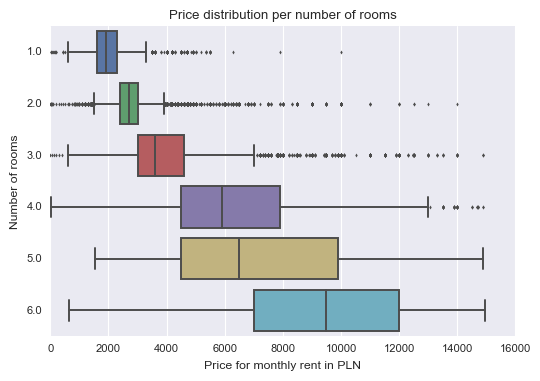

In [21]:
ax = sns.boxplot(data=dataset, y='n_rooms',x='price',fliersize=2,orient='h')
ax.set(xlabel='Price for monthly rent in PLN', ylabel='Number of rooms', title='Price distribution per number of rooms')
plt.show()

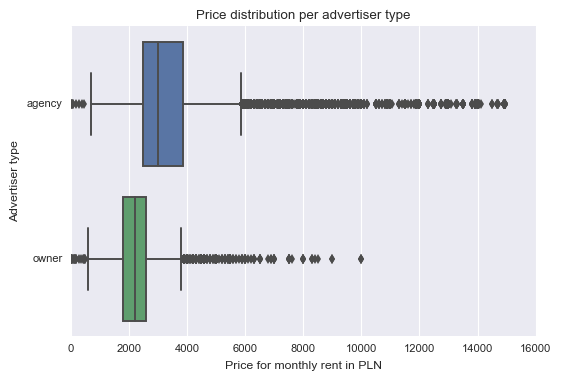

In [22]:
ax = sns.boxplot(data=dataset,y='advertiser',x='price',orient='h')
ax.set(xlabel='Price for monthly rent in PLN', ylabel='Advertiser type', title='Price distribution per advertiser type')
plt.show()

In [23]:
location = pd.get_dummies(dataset['location'])

In [24]:
model_dataset = pd.concat([dataset,location],axis=1)
model_dataset.drop(['location','advertiser','price_m2'],axis=1,inplace=True)

In [25]:
model_dataset.head()

,price,n_rooms,size_m2,Bemowo,Bialoleka,Bielany,Mokotow,Ochota,Praga Polnoc,Praga Poludnie,...,Srodmiescie,Targowek,Ursus,Ursynow,Wawer,Wesola,Wilanow,Wlochy,Wola,Zoliborz
0,3200.0,2.0,48.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,4000.0,2.0,60.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,4500.0,2.0,60.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3200.0,2.0,56.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,3000.0,2.0,54.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Linear regression model

In [26]:
X = model_dataset.drop('price',axis=1)
y = model_dataset['price']

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [29]:
from sklearn.linear_model import LinearRegression

In [30]:
lm = LinearRegression()

In [31]:
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [32]:
coeffs = pd.DataFrame(data=lm.coef_,index=X.columns, columns=['Coefficient'])

In [33]:
coeffs.sort_values(by='Coefficient',inplace=True)

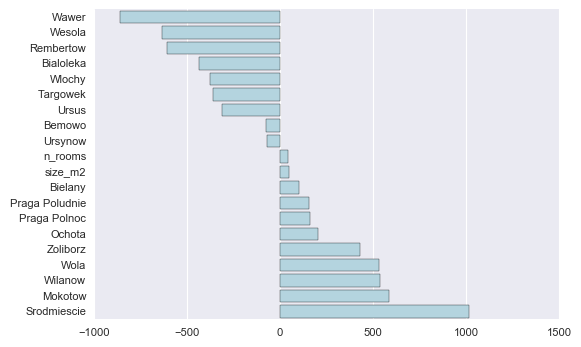

In [34]:
sns.barplot(data=coeffs.transpose(),orient='h',color='lightblue')

In [35]:
pred = lm.predict(X_test)

In [36]:
from sklearn.metrics import r2_score

In [37]:
r2_score(y_test,pred)

0.72635398518618177